<a href="https://colab.research.google.com/github/LEEGWONSEOK/CSAI_assignment/blob/main/%5B%EA%B7%B9%EB%9D%BD%5D_n211_%EC%9D%B4%EA%B6%8C%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 모듈
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
## 옵션
pd.options.display.float_format = '{:.1f}'.format
#pd.reset_option('display.float_format')
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
## 데이터셋 불러오기
data_set = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv'
df = pd.read_csv(data_set)

df.head()
#df.shape  # (21613, 21)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5,-122.3,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7,-122.3,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7,-122.2,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5,-122.4,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6,-122.0,1800,7503


In [4]:
## describe 확인
df['price'].describe()

count     21613.0
mean     540088.1
std      367127.2
min       75000.0
25%      321950.0
50%      450000.0
75%      645000.0
max     7700000.0
Name: price, dtype: float64

### **01번 문제**

In [5]:
## 상관계수(corr) 이용하여 상관관계가 높은 것 찾기
df.T
corr = df.corr(method = 'pearson')
corr.nlargest(2, ['price'])

# → price(target) 과 가장 상관관계가 높은 sqft_living(feature).

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.0,1.0,0.3,0.5,0.7,0.1,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.1,0.1,-0.1,0.3,0.0,0.6,0.1
sqft_living,-0.0,0.7,0.6,0.8,1.0,0.2,0.4,0.1,0.3,-0.1,0.8,0.9,0.4,0.3,0.1,-0.2,0.1,0.2,0.8,0.2


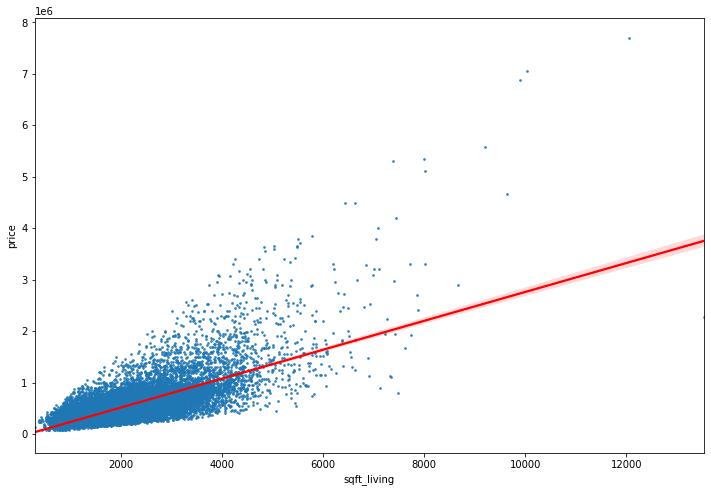

In [6]:
## 시각화 하기
sns.regplot(x=df['sqft_living'], y=df['price'], scatter_kws={'s':3}, line_kws={'color': 'red'});

# → price 와 sqft_living은 양의 상관관계가 있다.

### **02번 문제**

In [7]:
## target(price), feature(grade) 기준모델(회귀문제)
x = df['grade']
y = df['price']
predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

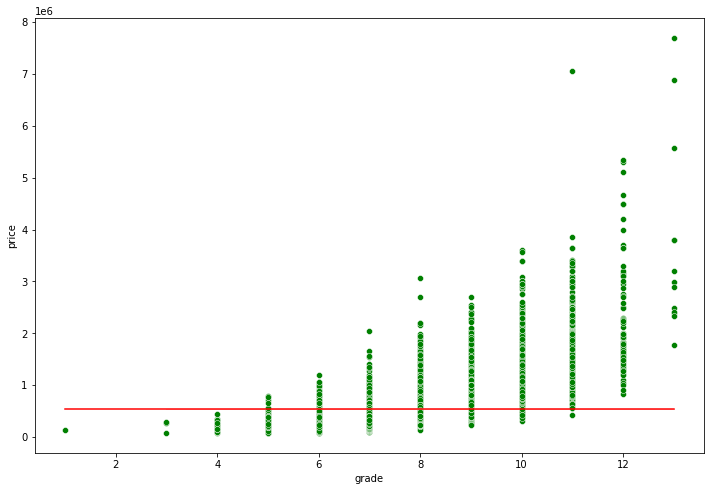

In [8]:
## 시각화
sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='green');

In [9]:
## 설명
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


### **03번 문제**

In [10]:
## 모델 선택 : LinearRegression
model = LinearRegression()

feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)   # fit() : 기존 데이터로 트레이닝 돌리는 함수

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
## 샘플 feature 하나 넣어서 돌려보기
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]}grade 의 주택 예상 가격은 ${int(y_pred)} 입니다.')

# → 6 grade의 주택 예상 가격은 $194700 입니다.

6grade 의 주택 예상 가격은 $194700 입니다.


In [12]:
## 시각화 준비
X_test = [[x] for x in df['grade']]
y_pred = model.predict(X_test)    # predict() : 새로운 데이터 예측하게 해주는 함수
y_pred

array([[403157.96019888],
       [403157.96019888],
       [194700.3977405 ],
       ...,
       [403157.96019888],
       [611615.52265726],
       [403157.96019888]])

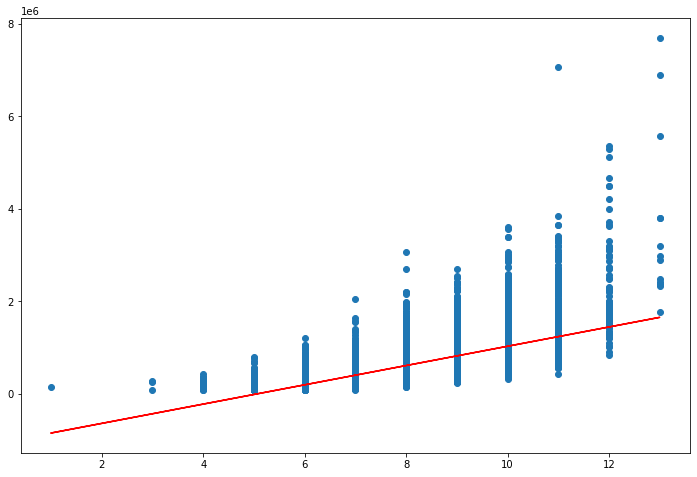

In [13]:
## 시각화
plt.scatter(X_train, y_train, linewidth=1)
plt.plot(X_test, y_pred, color='red');

In [14]:
## 해당 모델로 grade별 얼마로 나오는지 확인 

pred_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in pred_list:
  X_test = [[i]]
  y_pred = model.predict(X_test)

  print(f'{X_test[0][0]}grade 의 주택 예상 가격은 ${int(y_pred)} 입니다.')

# → 5grade 부터 마이너스로 되는거 보니까 좋은 모델이 아닌거 같다.

1grade 의 주택 예상 가격은 $-847587 입니다.
2grade 의 주택 예상 가격은 $-639129 입니다.
3grade 의 주택 예상 가격은 $-430672 입니다.
4grade 의 주택 예상 가격은 $-222214 입니다.
5grade 의 주택 예상 가격은 $-13757 입니다.
6grade 의 주택 예상 가격은 $194700 입니다.
7grade 의 주택 예상 가격은 $403157 입니다.
8grade 의 주택 예상 가격은 $611615 입니다.
9grade 의 주택 예상 가격은 $820073 입니다.
10grade 의 주택 예상 가격은 $1028530 입니다.
11grade 의 주택 예상 가격은 $1236988 입니다.
12grade 의 주택 예상 가격은 $1445445 입니다.
13grade 의 주택 예상 가격은 $1653903 입니다.
14grade 의 주택 예상 가격은 $1862360 입니다.


In [15]:
## grade별 개수 확인
df.groupby(['grade']).size()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
dtype: int64

In [16]:
## grade별 평균
df_grade = df[['grade', 'price']]
df_grade.groupby(['grade'], as_index=False).mean()

,grade,price
0,1,142000.0
1,3,205666.7
2,4,214381.0
3,5,248524.0
4,6,301919.6
5,7,402590.3
6,8,542852.8
7,9,773513.2
8,10,1071771.1
9,11,1496841.7


### **04번 문제**

In [17]:
## 회귀계수(coefficient) 확인
model.coef_

# → 회귀계수 : 208457.56245838

array([[208457.56245838]])

In [18]:
## y 절편(intercept) 확인
model.intercept_

array([-1056044.97700977])

### **05번 문제**

In [19]:
## 모델 선택 : LinearRegression
model2 = LinearRegression()

feature = ['sqft_living']
target = ['price']
X_train2 = df[feature]
y_train2 = df[target]

model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model2.coef_

# → 회귀계수 : 280.6235679

array([[280.6235679]])